In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# "C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6\02 Data\Prepared Data\rgs_csv"
path = r'C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6'

In [4]:
rgs = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'rgs_csv'), index_col = 0)

In [5]:
rgs.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty,winner,first_shooter,match_time,match_winner,country_match_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,draw,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home win,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home win,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,draw,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home win,Scotland


In [6]:
rgs[['home_score', 'away_score',]]

,home_score,away_score
0,0,0
1,4,2
2,2,1
3,2,2
4,3,0
...,...,...
74513,1,0
74514,0,2
74515,0,2
74516,0,1


In [7]:
rgs_short = rgs[['home_score', 'away_score']]

In [8]:
rgs_short.head()

,home_score,away_score
0,0,0
1,4,2
2,2,1
3,2,2
4,3,0


In [9]:
rgs_short.shape

(74518, 2)

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(rgs_short).score(rgs_short) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-559413.9710673793,
 -338192.9195765163,
 -232222.16024708765,
 -172619.73929644004,
 -140804.78593309916,
 -117710.28627930241,
 -101997.41818612866,
 -87739.97597135355,
 -78804.53558481846]

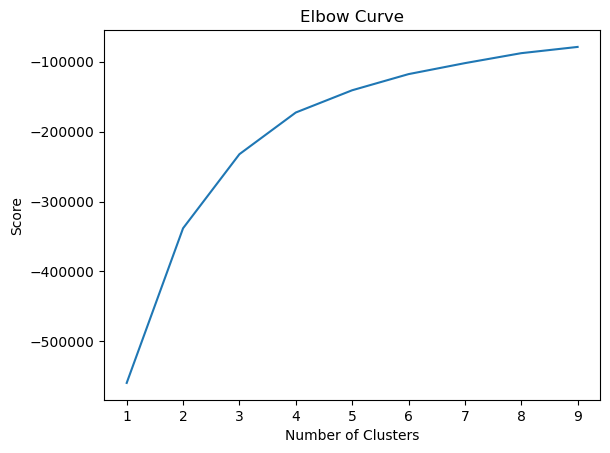

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(rgs_short)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
rgs_short['clusters'] = kmeans.fit_predict(rgs_short)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\AppData\Local\Temp\ipykernel_22532\2210830196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgs_short['clusters'] = kmeans.fit_predict(rgs_short)


In [16]:
rgs_short.head()

,home_score,away_score,clusters
0,0,0,2
1,4,2,1
2,2,1,2
3,2,2,2
4,3,0,2


In [17]:
rgs_short['clusters'].value_counts()

clusters
2    47262
1    14719
0    12537
Name: count, dtype: int64

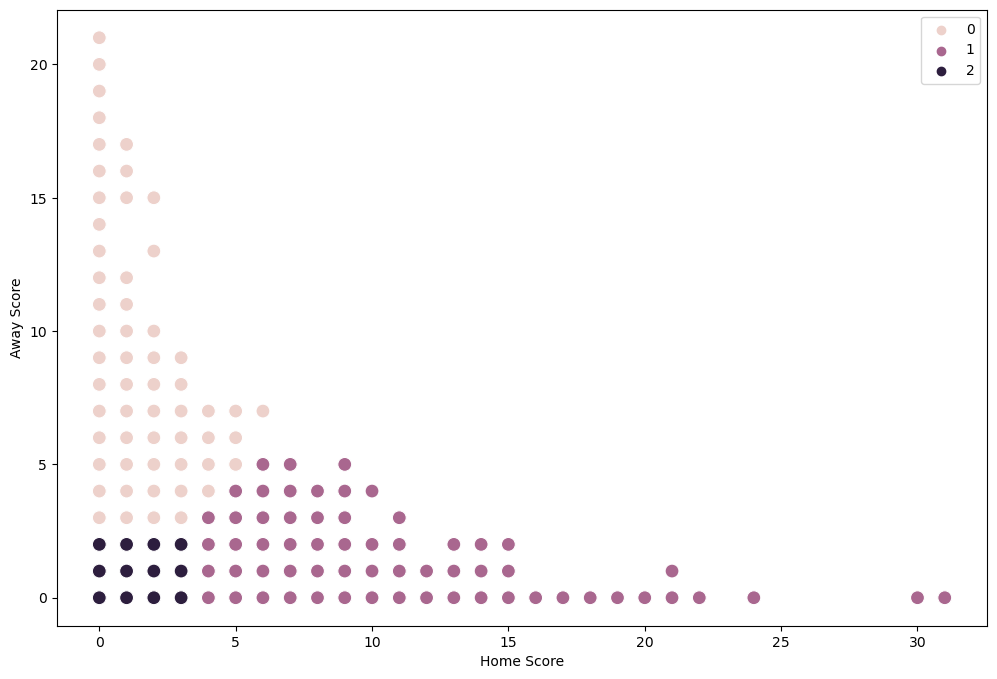

In [18]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=rgs_short['home_score'], y=rgs_short['away_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Home Score') # Label x-axis.
plt.ylabel('Away Score') # Label y-axis.
plt.show()

## I broke this graph up into 3 clusters. The dark purple represents the majority of the results. This shows competitive games. Light purple indicates games that the home side hada high scoring game. The tan color indicates matches the away side had a high scoring game.

In [19]:
rgs_short.loc[rgs_short['clusters'] == 0, 'cluster'] = 'tan'
rgs_short.loc[rgs_short['clusters'] == 1, 'cluster'] = 'purple'
rgs_short.loc[rgs_short['clusters'] == 2, 'cluster'] = 'darkest purple'

C:\Users\asus\AppData\Local\Temp\ipykernel_22532\1000980137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgs_short.loc[rgs_short['clusters'] == 0, 'cluster'] = 'tan'


In [20]:
rgs_short.groupby('cluster').agg({'home_score':['mean', 'median'], 
                         'away_score':['mean', 'median']})

home_score        away_score       
                     mean median       mean median
cluster                                           
darkest purple   1.469341    1.0   0.896809    1.0
purple           5.626945    5.0   0.705958    0.0
tan              1.085028    1.0   4.145649    4.0

## This chart and data has limited use on its own. If other data was to be paired with this data, it could be used to determine the achievements of a country and the dominance and/or capabilities of a country or lack thereof.